# 🧠 Cache Simulator with Replacement Policies and Visualization


In [1]:
import random
import time

def generate_trace(filename="example_trace.txt", length=1000, base_addr=0x1000, locality_window=16):
    
    
    random.seed(time.time())

    trace = []
    for _ in range(length):
        if random.random() < 0.5:
            addr = base_addr + random.randint(0, locality_window)
        else:
            addr = base_addr + random.randint(0, 10 * locality_window)
        trace.append(addr)

    with open(filename, 'w') as f:
        for addr in trace:
            f.write(hex(addr) + '\n')


generate_trace("example_trace.txt")



Cache Simulation Results Summary:

╒═══════════════════════╤════════╤══════════╤═══════════════╤═══════════════════╤═════════════╤══════════════╕
│ Config                │   Hits │   Misses │   Cold Misses │   Conflict Misses │   Hit Ratio │   Miss Ratio │
╞═══════════════════════╪════════╪══════════╪═══════════════╪═══════════════════╪═════════════╪══════════════╡
│ 16-blk1-assoc1-LRU    │    289 │      711 │           154 │               557 │        0.29 │         0.71 │
├───────────────────────┼────────┼──────────┼───────────────┼───────────────────┼─────────────┼──────────────┤
│ 16-blk1-assoc1-FIFO   │    289 │      711 │           154 │               557 │        0.29 │         0.71 │
├───────────────────────┼────────┼──────────┼───────────────┼───────────────────┼─────────────┼──────────────┤
│ 16-blk1-assoc1-Random │    289 │      711 │           154 │               557 │        0.29 │         0.71 │
├───────────────────────┼────────┼──────────┼───────────────┼───────────────

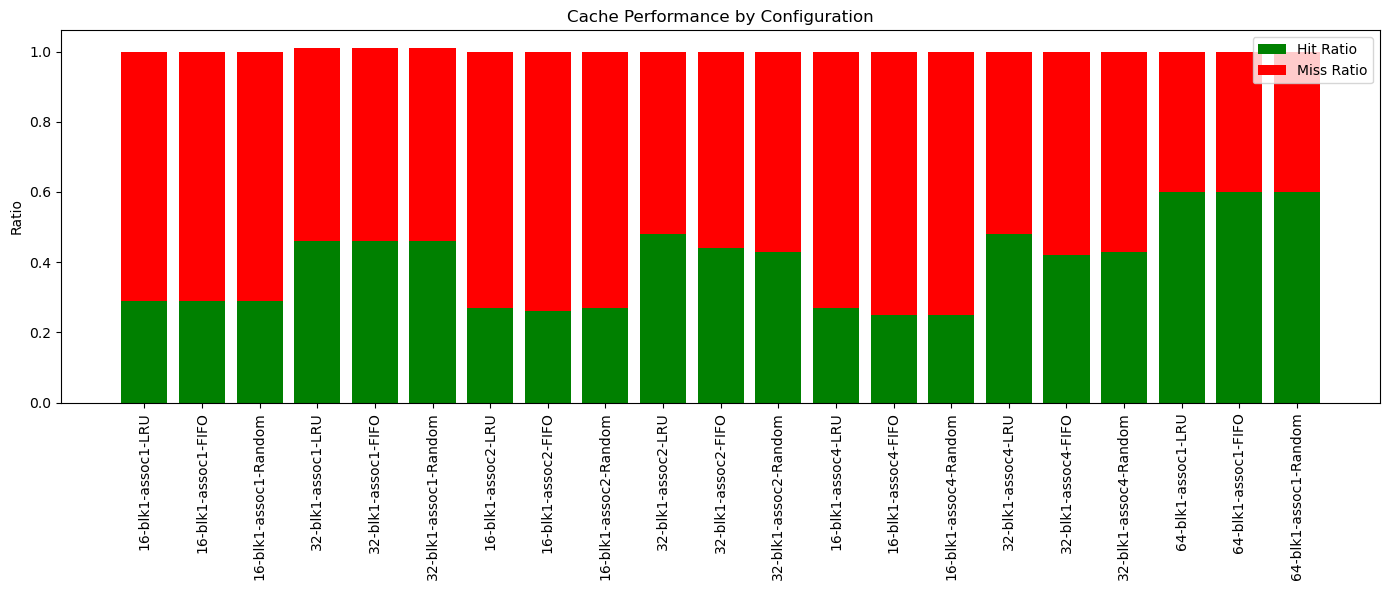

In [2]:
from cache_simulator import CacheSimulator
import matplotlib.pyplot as plt
from tabulate import tabulate  

configs = [
    (16, 1, 1, 'LRU'), (16, 1, 1, 'FIFO'), (16, 1, 1, 'Random'),
    (32, 1, 1, 'LRU'), (32, 1, 1, 'FIFO'), (32, 1, 1, 'Random'),
    (16, 1, 2, 'LRU'), (16, 1, 2, 'FIFO'), (16, 1, 2, 'Random'),
    (32, 1, 2, 'LRU'), (32, 1, 2, 'FIFO'), (32, 1, 2, 'Random'),
    (16, 1, 4, 'LRU'), (16, 1, 4, 'FIFO'), (16, 1, 4, 'Random'),
    (32, 1, 4, 'LRU'), (32, 1, 4, 'FIFO'), (32, 1, 4, 'Random'),
    (64, 1, 1, 'LRU'), (64, 1, 1, 'FIFO'), (64, 1, 1, 'Random'),
]

results = []

for cache_size, block_size, associativity, policy in configs:
    sim = CacheSimulator(cache_size, block_size, associativity, policy)

    try:
        sim.load_trace('example_trace.txt')
    except FileNotFoundError:
        print("Trace file not found. Please add 'example_trace.txt'.")
        continue

    sim.run()

    total = sim.hits + sim.misses
    hit_ratio = sim.hits / total if total > 0 else 0
    miss_ratio = sim.misses / total if total > 0 else 0

    label = f"{cache_size}-blk{block_size}-assoc{associativity}-{policy}"
    results.append({
        "Config": label,
        "Hits": sim.hits,
        "Misses": sim.misses,
        "Cold Misses": sim.cold_misses,
        "Conflict Misses": sim.conflict_misses,
        "Hit Ratio": f"{hit_ratio:.2f}",
        "Miss Ratio": f"{miss_ratio:.2f}",
    })

    sim.save_logs(f"logs/{label}.log")

print("\nCache Simulation Results Summary:\n")
print(tabulate(results, headers="keys", tablefmt="fancy_grid"))

import csv

with open("detailed_results.csv", "w", newline="") as csvfile:
    fieldnames = ["Config", "Hits", "Misses", "Cold Misses", "Conflict Misses", "Hit Ratio", "Miss Ratio"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(results)

if results:
    labels = [r["Config"] for r in results]
    hit_ratios = [float(r["Hit Ratio"]) for r in results]
    miss_ratios = [float(r["Miss Ratio"]) for r in results]
    x = range(len(labels))

    fig, ax = plt.subplots(figsize=(14, 6))
    ax.bar(x, hit_ratios, color='green', label='Hit Ratio')
    ax.bar(x, miss_ratios, bottom=hit_ratios, color='red', label='Miss Ratio')
    ax.set_ylabel('Ratio')
    ax.set_title('Cache Performance by Configuration')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=90)
    ax.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No results available. Please check trace file.")
